In [2]:
from scipy.io import loadmat, savemat
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

In [17]:
def datenum_to_datetime(datenum_arr):
    """
    This is just for processing swift data. 
    :param datenum_arr: array of datenum format
    :return:        Datetime object corresponding to datenum.
    """
    #If its a pandas array loop through and do each elments
    dt_out = np.empty(len(datenum_arr), dtype=object)
    for n in range(len(datenum_arr)):
        datenum = datenum_arr[n]
        days = datenum % 1
        hours = days % 1 * 24
        minutes = hours % 1 * 60
        seconds = minutes % 1 * 60
        dtime = datetime.datetime.fromordinal(int(datenum)) \
               + datetime.timedelta(days=int(days)) \
               + datetime.timedelta(hours=int(hours)) \
               + datetime.timedelta(minutes=int(minutes)) \
               + datetime.timedelta(seconds=round(seconds)) \
               - datetime.timedelta(days=366)
        dt_out[n] = dtime
    return dt_out

In [85]:
#Here is just some fake matlab datenum timestamps and corresponding fake data
test_time = [736782 , 736783, 736784, 736785, 736786, 736787]
fake_data = np.random.random(len(test_time))

In [86]:
#Convert to python datetime
datetime_list = datenum_to_datetime(test_time)

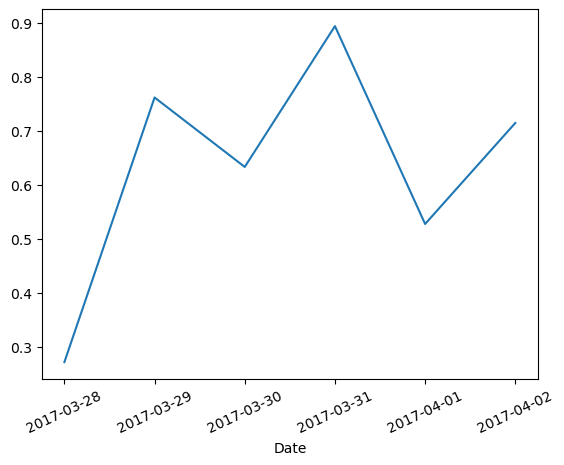

In [90]:
#Plot with python datetime as x-axis
plt.figure()
plt.plot(datetime_list, fake_data)
plt.xlabel('Date')
plt.xticks(rotation=25);